In [2]:
%run wikidata_functions.ipynb

[('Q146', 'house cat', 'domesticated feline'), ('Q4167836', 'Wikimedia category', "use with 'instance of' (P31) for Wikimedia category"), ('Q387278', 'Kellas cat', 'cat'), ('Q300918', 'cat', 'Unix utility that concatenates and lists files'), ('Q10813994', 'Tsim Tung Brother Cream', 'cat')]
[('Q76', 'Barack Obama', 'president of the United States from 2009 to 2017'), ('Q61909968', 'Barack Obama', 'Wikimedia disambiguation page')]
2


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [153]:
import random
import time
import re
import pickle

In [148]:
from chatgpt_api import query_gpt

In [5]:
G = nx.DiGraph()

In [6]:
G.add_node("item:Garfield")

In [7]:
G.add_node("item:cat")

In [8]:
# G.add_edge("item:Garfield", "item:cat", object="predicate:is a")

In [9]:
G.add_edge("item:Garfield", "item:cat")
G["item:Garfield"]["item:cat"]["predicate"]="is_a"

{('item:Garfield', 'item:cat'): Text(0.0, 0.0, "{'predicate': 'is_a'}")}

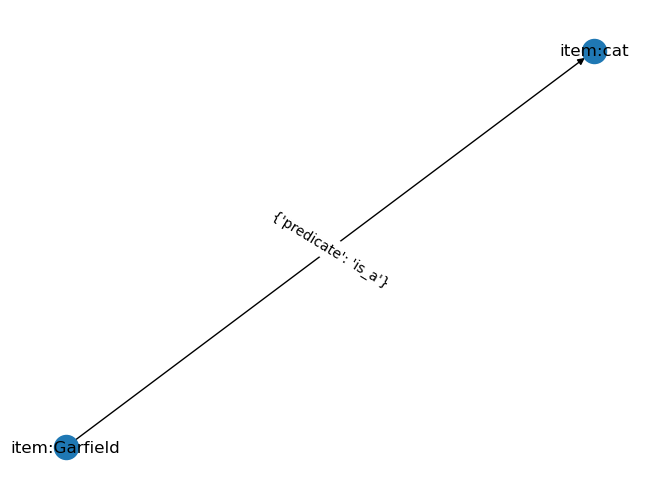

In [10]:
nx.draw(G, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

In [11]:
cat_query = 'DESCRIBE wd:Q146'

results = query_wikidata(cat_query)
cat_triples = process_describe(results, 1, 500000)

In [12]:
cat_G = nx.DiGraph()

In [14]:
def add_triples(G, triples):
    for t in triples:
        G.add_node(t[0])
        G.add_node(t[2])
        G.add_edge(t[0], t[2])
        G[t[0]][t[2]]["pred"] = t[1]

In [92]:
def create_graph (start = 'Q146', layers = 1):
    G = nx.DiGraph()
    curr = [start]
    core = set()
    for i in range(layers):
        nxt = []
        core.update(curr)
        print(core)
        for seed in curr:
            print(seed) 
            # query = f"DESCRIBE wd:{seed}"
            # print("processing ", seed)
            query = make_construct_query(seed)
            results = query_wikidata(query)
            triples = process_construct(results, 1, 500000)
            # print(triples)
        
            add_triples(G, triples)
        
            for nb in G.neighbors(seed):
                label = get_label_from_qid(nb) 
                # print(nb, label)
                nxt.append(nb)

        nxt = list(filter(lambda s: int(s[1:]) <= 1000, nxt))
        curr = nxt

    return G, core

In [85]:
def edges_to_triples(G, n=None, randomize=True):
    if n == None:
        n = min(10, G.number_of_edges())
    if G.number_of_edges() < n:
        n = G.number_of_edges()

    if randomize: 
        l = random.sample(list(G.edges.data('pred')), n)
    else:
        l = list(G.edges.data('pred'))[:n]
        
    for Q1, Q2, P in l:
        q1 = get_label_from_qid(Q1)
        q2 = get_label_from_qid(Q2)
        p = get_property_from_pid(P)
        print(Q1, ": ", q1, "/", P, ": ", p, "/", Q2, ": ",q2)

In [80]:
cat_G2, core = create_graph(layers = 3)

processing  Q146
[('Q146', 'P1552', 'Q170430'), ('Q146', 'P279', 'Q25265'), ('Q146', 'P279', 'Q39201'), ('Q146', 'P366', 'Q39201')]


In [81]:
cat_G2.number_of_nodes()

4

In [90]:
t1 = time.time()
G2, core2 = create_graph("Q76", 2)
t2 = time.time()
print(t2-t1)

147.33810710906982


In [101]:
# save graph object to file
pickle.dump(G2, open('graphs/obama_2.pickle', 'wb'))
pickle.dump(core2, open('graphs/obama_2_core.pickle', 'wb'))

list(map(get_label_from_qid2, list(filter(lambda s: int(s[1:]) <= 10000, core))))

In [93]:
t1 = time.time()
G3, core3 = create_graph("Q76", 3)
t2 = time.time()
print(t2-t1)

{'Q76'}
Q76
{'Q30', 'Q114', 'Q76', 'Q61', 'Q5'}
Q5
Q30
Q114
Q61
{'Q874', 'Q760', 'Q42', 'Q361', 'Q298', 'Q1000', 'Q819', 'Q76', 'Q39', 'Q664', 'Q189', 'Q215', 'Q242', 'Q948', 'Q788', 'Q347', 'Q31', 'Q759', 'Q801', 'Q419', 'Q797', 'Q786', 'Q784', 'Q225', 'Q769', 'Q986', 'Q232', 'Q945', 'Q90', 'Q804', 'Q79', 'Q235', 'Q924', 'Q912', 'Q657', 'Q974', 'Q796', 'Q41', 'Q710', 'Q916', 'Q970', 'Q32', 'Q843', 'Q878', 'Q96', 'Q851', 'Q757', 'Q730', 'Q88', 'Q15', 'Q458', 'Q49', 'Q398', 'Q812', 'Q403', 'Q805', 'Q858', 'Q28', 'Q695', 'Q771', 'Q790', 'Q214', 'Q148', 'Q954', 'Q711', 'Q702', 'Q258', 'Q30', 'Q45', 'Q265', 'Q230', 'Q928', 'Q227', 'Q956', 'Q424', 'Q967', 'Q965', 'Q173', 'Q184', 'Q902', 'Q800', 'Q224', 'Q244', 'Q252', 'Q817', 'Q16', 'Q766', 'Q750', 'Q889', 'Q736', 'Q971', 'Q43', 'Q414', 'Q98', 'Q983', 'Q191', 'Q77', 'Q142', 'Q315', 'Q709', 'Q217', 'Q228', 'Q38', 'Q36', 'Q211', 'Q574', 'Q953', 'Q683', 'Q824', 'Q813', 'Q220', 'Q99', 'Q833', 'Q399', 'Q183', 'Q240', 'Q115', 'Q881', 'Q145', 'Q40

In [102]:
# save graph object to file
pickle.dump(G3, open('graphs/obama_3.pickle', 'wb'))
pickle.dump(core3, open('graphs/obama_3_core.pickle', 'wb'))

In [149]:
G3 = pickle.load(open('graphs/obama_3.pickle', 'rb'))
core3 = pickle.load(open('graphs/obama_3_core.pickle', 'rb'))

In [150]:
pred = list(map(lambda e:e[2], list(G3.edges.data('pred'))))

In [151]:
from collections import Counter
Counter(pred)

Counter({'P530': 5668,
         'P463': 2489,
         'P150': 2134,
         'P2936': 2035,
         'P47': 407,
         'P31': 294,
         'P421': 215,
         'P361': 209,
         'P832': 194,
         'P17': 175,
         'P78': 159,
         'P163': 158,
         'P30': 157,
         'P237': 145,
         'P206': 144,
         'P38': 141,
         'P37': 138,
         'P527': 137,
         'P190': 131,
         'P36': 122,
         'P172': 120,
         'P1589': 114,
         'P85': 112,
         'P122': 110,
         'P205': 100,
         'P1889': 88,
         'P706': 82,
         'P1365': 76,
         'P2184': 73,
         'P793': 70,
         'P140': 69,
         'P610': 69,
         'P1343': 66,
         'P138': 66,
         'P35': 64,
         'P2238': 55,
         'P1344': 47,
         'P194': 31,
         'P6': 31,
         'P8744': 28,
         'P106': 27,
         'P2633': 27,
         'P1304': 25,
         'P1906': 23,
         'P6379': 21,
         'P200': 21,
    

Top 4 predicates seen, all above 2000 edges

'P530': 5668,
'P463': 2489,
 'P150': 2134,
 'P2936': 2035

In [157]:
G3.number_of_nodes()

6460

In [159]:
len(core3)

183

In [154]:
def process_gpt_contents(contents, reps):
    assert len(d) == 42
    tsents = [0]*21
    fsents = [0]*21

    for i, key in enumerate(contents.keys()):
        content = contents[key]
        
        if i >= 21:
            rep = random.choice(reps)
            subj = get_label_from_qid(key[1])
            content = re.sub(subj, rep, content)
            
        sentences = content.split("\n")

        if i < 21:
            tsents[i] = sentences
        else:
            fsents[i+21] = sentences

    return tsents, fsents